In [1]:
import pandas as pd
import bnlearn as bn
import networkx as nx
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from causalnex.structure.notears import from_pandas
from pgmpy.estimators import PC
import seaborn as sns

%matplotlib inline

In [2]:
cohort_file = '/home/gaurang/glycemic_control/data/glycaemia_project_csvs/data_v2/v2_gsdip.csv'

In [3]:
cohort_df = pd.read_csv(cohort_file)
cohort_df

,stay_id,glucose,hr,respiration_24hours,coagulation_24hours,liver_24hours,cardiovascular_24hours,cns_24hours,renal_24hours,sofa_24hours,...,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,diabetes,diabetes_type,septic,weight_kg,height_cm,bmi
0,30000213,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
1,30000213,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
2,30000213,156.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
3,30000213,171.0,8.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
4,30000213,164.0,12.0,0.0,0.0,0.0,1.0,1.0,3.0,5.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899732,39999552,86.0,13.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.5,172.72,21.6
899733,39999552,91.0,14.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.5,172.72,21.6
899734,39999552,134.0,16.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.5,172.72,21.6
899735,39999552,92.0,17.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.5,172.72,21.6


In [27]:
cohort_df[cohort_df.stay_id == 32380519]

,stay_id,glucose,hr,respiration_24hours,coagulation_24hours,liver_24hours,cardiovascular_24hours,cns_24hours,renal_24hours,sofa_24hours,...,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,diabetes,diabetes_type,septic,weight_kg,height_cm,bmi
217945,32380519,173.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,5.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7
217946,32380519,173.0,8.0,3.0,0.0,0.0,1.0,1.0,2.0,7.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7
217947,32380519,129.0,10.0,3.0,0.0,0.0,1.0,1.0,2.0,7.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7
217948,32380519,144.0,14.0,3.0,0.0,0.0,1.0,1.0,2.0,7.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7
217949,32380519,133.0,19.0,3.0,0.0,0.0,1.0,1.0,2.0,7.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218661,32380519,122.0,2272.0,3.0,2.0,0.0,3.0,4.0,0.0,12.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7
218662,32380519,116.0,2273.0,3.0,2.0,0.0,3.0,4.0,0.0,12.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7
218663,32380519,130.0,2276.0,3.0,2.0,0.0,3.0,4.0,0.0,12.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7
218664,32380519,94.0,2279.0,3.0,2.0,0.0,3.0,4.0,0.0,12.0,...,0,0,0,10,1,2,1,88.5,172.72,29.7


In [6]:
len(cohort_df)

899737

In [7]:
cohort_df.columns

Index(['stay_id', 'glucose', 'hr', 'respiration_24hours',
       'coagulation_24hours', 'liver_24hours', 'cardiovascular_24hours',
       'cns_24hours', 'renal_24hours', 'sofa_24hours', 'dex5', 'dex>5',
       'dexPN', 'pre_dex5', 'pre_dex>5', 'pre_dexPN', 'pos_dex5', 'pos_dex>5',
       'pos_dexPN', 'SC_sa_insulin', 'SC_ma_insulin', 'SC_la_insulin',
       'PN_sa_insulin', 'IV_sa_insulin', 'pre_SC_sa_insulin',
       'pre_SC_ma_insulin', 'pre_SC_la_insulin', 'pre_PN_sa_insulin',
       'pre_IV_sa_insulin', 'pos_SC_sa_insulin', 'pos_SC_ma_insulin',
       'pos_SC_la_insulin', 'pos_PN_sa_insulin', 'pos_IV_sa_insulin',
       'subject_id', 'hadm_id', 'gender', 'dod', 'admittime', 'dischtime',
       'los_hospital', 'admission_age', 'ethnicity', 'hospital_expire_flag',
       'hospstay_seq', 'first_hosp_stay', 'icu_intime', 'icu_outtime',
       'los_icu', 'icustay_seq', 'first_icu_stay', 'age_score',
       'myocardial_infarct', 'congestive_heart_failure',
       'peripheral_vascular_dis

In [8]:
metadata_cols = ['stay_id', 'gender', 'admission_age', 'ethnicity', 'diabetes']
metadata_df = cohort_df[metadata_cols]
print(len(metadata_df))
metadata_df.drop_duplicates(subset=['stay_id'], inplace=True)
print(len(metadata_df))

899737
35007


In [9]:
stay_counts_df = cohort_df.groupby(['stay_id'])[['hr', 'glucose']].apply(sum)
stay_counts_df

,hr,glucose
stay_id,,
30000213,167.0,2302.0
30000484,103.0,320.0
30000646,277.0,761.0
30001148,105.0,1324.0
30002415,184.0,2322.0
...,...,...
39999172,128.0,651.0
39999230,1701.0,2868.0
39999286,50.0,587.0


In [13]:
stay_counts_df['days'] = stay_counts_df.hr / 24.0

(array([2263., 2072., 2319., 1969., 1227.,  981.,  865.,  823.,  685.,
         524.,  494.,  470.,  422.,  421.,  377.,  348.,  289.,  284.,
         280.,  232.,  244.,  216.,  212.,  177.,  208.,  223.,  159.,
         137.,  166.,  144.,  166.,  133.,  144.,  139.,  109.,  128.,
         113.,  118.,   94.,  100.,   92.,  104.,   91.,   86.,   86.,
          79.,   92.,   92.,   84.,   67.,   70.,   60.,   74.,   72.,
          62.,   60.,   73.,   63.,   61.,   65.,   52.,   57.,   52.,
          54.,   44.,   49.,   51.,   52.,   44.,   44.,   38.,   50.,
          57.,   60.,   42.,   34.,   51.,   36.,   25.,   34.,   37.,
          36.,   36.,   33.,   31.,   33.,   34.,   34.,   40.,   36.,
          31.,   32.,   31.,   17.,   33.,   23.,   31.,   19.,   21.,
          30.]),
 array([  3.  ,   4.97,   6.94,   8.91,  10.88,  12.85,  14.82,  16.79,
         18.76,  20.73,  22.7 ,  24.67,  26.64,  28.61,  30.58,  32.55,
         34.52,  36.49,  38.46,  40.43,  42.4 ,  44.37,  4

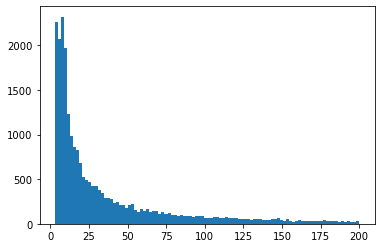

In [46]:
days = stay_counts_df['days'].values
plt.hist(days, range = [3, 200], bins=100)

In [37]:
len(stay_counts_df[(stay_counts_df.days > 3)].days)

27740

<AxesSubplot:xlabel='days'>

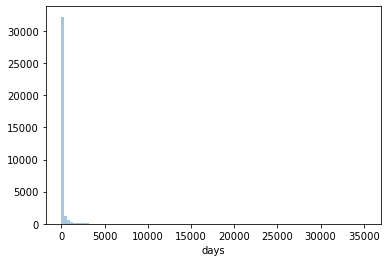

In [15]:
sns.distplot(stay_counts_df['days'], bins=100, kde=False)

In [8]:
metadata_df['stay_counts'] = stay_counts_df.values

In [9]:
metadata_df[metadata_df['stay_counts'] > 50]

,stay_id,gender,admission_age,ethnicity,diabetes,stay_counts
246,30006983,M,77,ASIAN,0,190
473,30007565,M,84,UNKNOWN,1,176
673,30008148,M,60,WHITE,1,65
803,30009339,M,64,WHITE,0,226
1029,30009505,M,75,WHITE,0,75
...,...,...,...,...,...,...
898947,39986775,F,65,WHITE,0,65
899090,39990093,M,54,WHITE,0,83
899390,39995735,M,62,WHITE,0,57
899447,39996073,F,66,HISPANIC/LATINO,0,65


In [10]:
meta_diabetic_df = metadata_df[metadata_df['diabetes'] == 1]
meta_nonDiabetic_df = metadata_df[metadata_df['diabetes'] == 0]

meta_child_df = metadata_df[metadata_df['admission_age'] < 20]
meta_youth_df = metadata_df[(20<=metadata_df['admission_age']) & (metadata_df['admission_age'] < 40)]
meta_middleAged_df = metadata_df[(40<=metadata_df['admission_age']) & (metadata_df['admission_age'] < 60)]
meta_old_df = metadata_df[metadata_df['admission_age'] >= 60]

meta_old_diabetic_df = meta_old_df[meta_old_df['diabetes'] == 1]
meta_old_nonDiabetic_df = meta_old_df[meta_old_df['diabetes'] == 0]

meta_youth_diabetic_df = meta_youth_df[meta_youth_df['diabetes'] == 1]
meta_youth_nonDiabetic_df = meta_youth_df[meta_youth_df['diabetes'] == 0]

In [11]:
diabetic_df = cohort_df[cohort_df['diabetes'] == 1]
nonDiabetic_df = cohort_df[cohort_df['diabetes'] == 0]

child_df = cohort_df[cohort_df['admission_age'] < 20]
youth_df = cohort_df[(20<=cohort_df['admission_age']) & (cohort_df['admission_age'] < 40)]
middleAged_df = cohort_df[(40<=cohort_df['admission_age']) & (cohort_df['admission_age'] < 60)]
old_df = cohort_df[cohort_df['admission_age'] >= 60]

old_diabetic_df = old_df[old_df['diabetes'] == 1]
old_nonDiabetic_df = old_df[old_df['diabetes'] == 0]

youth_diabetic_df = youth_df[youth_df['diabetes'] == 1]
youth_nonDiabetic_df = youth_df[youth_df['diabetes'] == 0]

### Hidden code

In [15]:
#getting per patient time series

group_len = 20
stay_groups = diabetic_df.groupby(by='stay_id')
for group in stay_groups:
    if len(group[1]) >= group_len:
        group_len = len(group[1])
        selected_group = group

iid_sampled_df = selected_group[1]
iid_sampled_df

,stay_id,glucose,hr,respiration_24hours,coagulation_24hours,liver_24hours,cardiovascular_24hours,cns_24hours,renal_24hours,sofa_24hours,...,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,diabetes,diabetes_type,septic,weight_kg,height_cm,bmi
325510,33576993,119.0,1.0,4.0,1.0,0.0,3.0,0.0,4.0,12.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3
325511,33576993,138.0,3.0,4.0,1.0,0.0,3.0,0.0,4.0,12.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3
325512,33576993,135.0,4.0,4.0,1.0,0.0,3.0,0.0,4.0,12.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3
325513,33576993,135.0,5.0,4.0,1.0,0.0,4.0,0.0,4.0,13.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3
325514,33576993,180.0,6.0,4.0,1.0,0.0,4.0,0.0,4.0,13.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326353,33576993,151.0,2154.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3
326354,33576993,99.0,2162.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3
326355,33576993,202.0,2167.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3
326356,33576993,144.0,2173.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,...,0,0,0,8,1,2,0,80.0,162.56,30.3


In [7]:
iid_df.columns

Index(['stay_id', 'hr', 'glucose', 'last_glucose_value', 'last_glucose_time',
       'gender', 'dod', 'los_hospital', 'admission_age', 'ethnicity',
       'hospital_expire_flag', 'icu_intime', 'los_icu', 'myocardial_infarct',
       'congestive_heart_failure', 'peripheral_vascular_disease',
       'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease',
       'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease',
       'diabetes_without_cc', 'diabetes_with_cc', 'paraplegia',
       'renal_disease', 'malignant_cancer', 'severe_liver_disease',
       'metastatic_solid_tumor', 'aids', 'charlson_comorbidity_index',
       'diabetes', 'diabetes_type', 'weight_kg', 'height_cm', 'bmi', 'septic',
       'short_term_hr_amount', 'mid_term_hr_amount', 'long_term_hr_amount',
       'last_short_term_amount', 'last_short_term_time',
       'short_term_amount_previous_hr', 'last_mid_term_amount',
       'last_mid_term_time', 'mid_term_amount_previous_hr',
       'last_long_te

In [9]:
#one hot encoding gender
one_hot = bn.bnlearn.df2onehot(iid_df[['gender']])
iid_df.drop(labels=['gender'], axis=1, inplace=True)
df = pd.concat([iid_df.reset_index(), one_hot[0]], axis=1)

In [10]:
#structure learning by bnlearn
c = PC(df)
model = c.estimate_skeleton(verbose=True)
print(model.edges())
DAG = bn.structure_learning.fit(df)

In [42]:
covariate_list = ['glucose', 'short_term_hr_amount', 'mid_term_hr_amount',
       'long_term_hr_amount', 'last_short_term_amount',
       'short_term_amount_previous_hr', 'last_mid_term_amount',
       'mid_term_amount_previous_hr', 'last_long_term_amount',
       'long_term_amount_previous_hr', 'dextrose_g_hr', 'last_dextrose_amount', 'temperature', 'respiration_24hours', 'coagulation_24hours', 'liver_24hours',
       'cardiovascular_24hours', 'cns_24hours', 'renal_24hours',
       'sofa_24hours', 'admission_age', 'bmi']


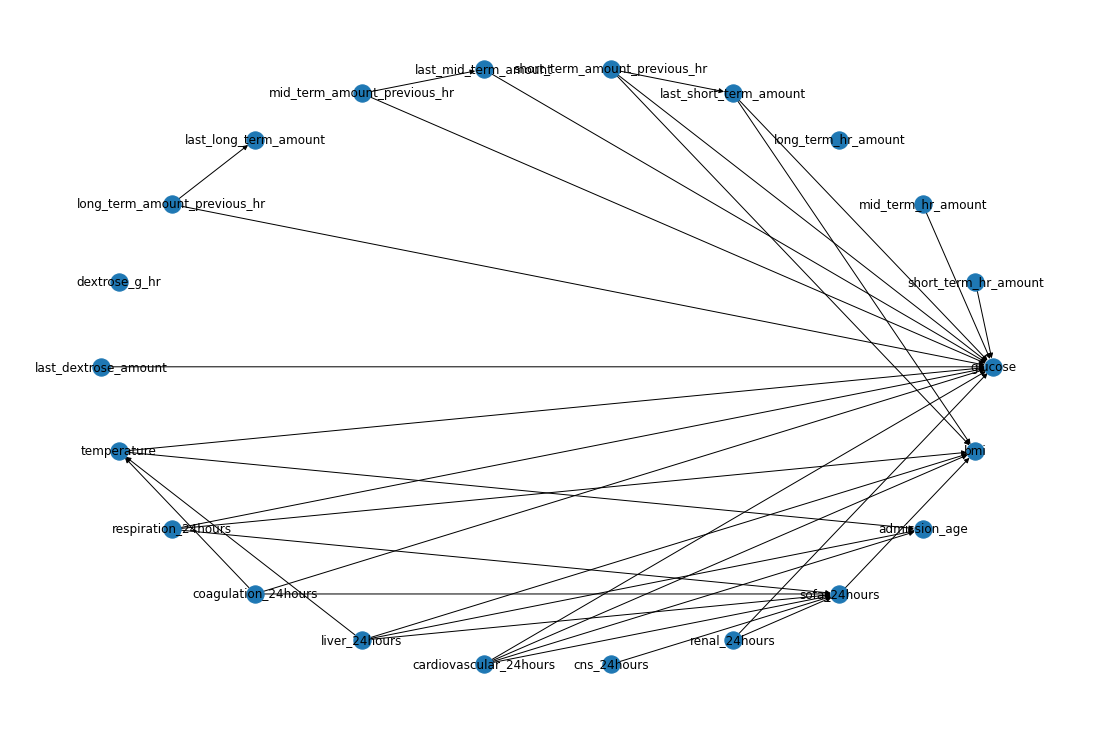

In [14]:
a.remove_edges_below_threshold(0.8)
plt.figure(figsize=(15,10))
nx.draw_circular(a)
nx.draw_networkx_labels(a, pos=nx.circular_layout(a))
plt.show()

### DAGS - individual

In [12]:
covariate_list = ['glucose', 'pre_dex>5', 'pre_dexPN', 'pre_SC_sa_insulin',
       'pre_SC_ma_insulin', 'pre_SC_la_insulin', 'pre_PN_sa_insulin',
       'pre_IV_sa_insulin']

In [13]:
meta_old_diabetic_df[meta_old_diabetic_df['stay_counts'] > 130]

,stay_id,gender,admission_age,ethnicity,diabetes,stay_counts
473,30007565,M,84,UNKNOWN,1,176
4155,30052347,M,92,ASIAN,1,298
9367,30109460,M,64,WHITE,1,187
11119,30129989,M,75,WHITE,1,135
23473,30271658,M,72,WHITE,1,623
...,...,...,...,...,...,...
883865,39830038,M,68,UNKNOWN,1,342
884899,39841151,M,73,WHITE,1,167
889293,39887235,F,75,BLACK/AFRICAN AMERICAN,1,190
891287,39906220,M,75,WHITE,1,184


In [43]:
a = nonDiabetic_df[nonDiabetic_df['stay_id'] == 30045625]   # white M 67 yrs - nondiab
b = diabetic_df[diabetic_df['stay_id'] == 30109460]         # white M 64 yrs - diab

In [44]:
a = from_pandas(a[covariate_list].dropna().sample(min(10000, len(a))))
b = from_pandas(b[covariate_list].dropna().sample(min(10000, len(b))))
a.remove_edges_below_threshold(0.8)
b.remove_edges_below_threshold(0.8)

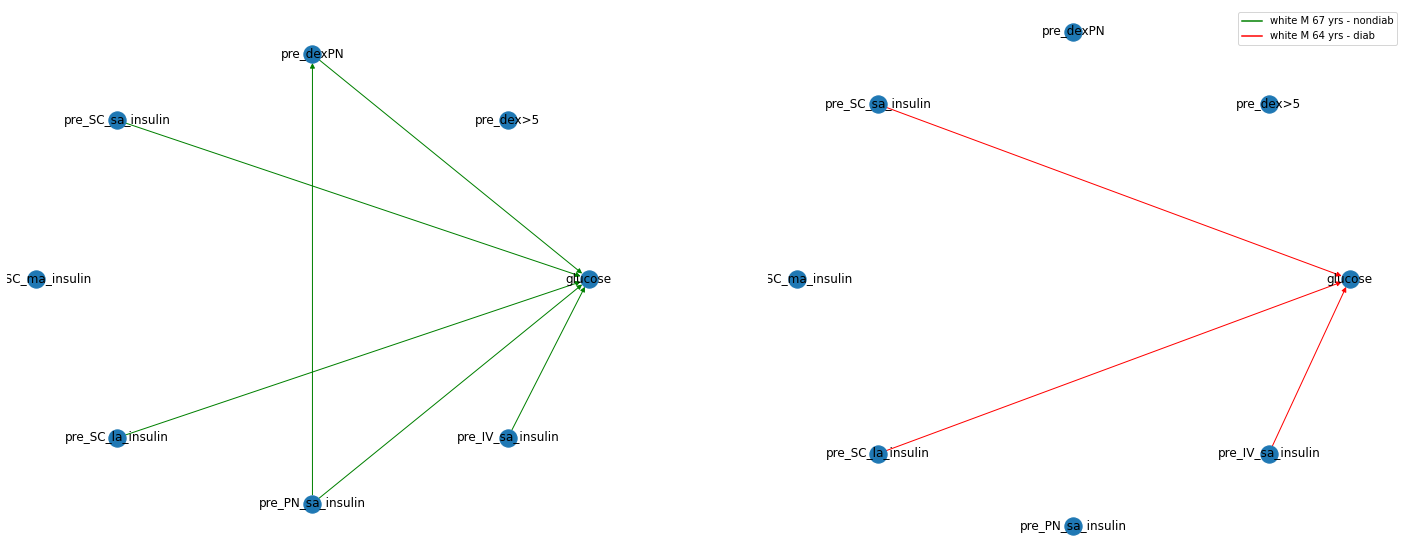

In [49]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
nx.draw_circular(a, edge_color='green')
nx.draw_networkx_labels(a, pos=nx.circular_layout(a))
plt.subplot(1,2,2)
nx.draw_circular(b, edge_color='red')
nx.draw_networkx_labels(b, pos=nx.circular_layout(b))
green_line = mlines.Line2D([], [], color='green', markersize=2, label='white M 67 yrs - nondiab')
red_line = mlines.Line2D([], [], color='red', markersize=2, label='white M 64 yrs - diab')
plt.legend(handles=[green_line, red_line])
plt.show()

In [50]:
edges_a = set(a.edges)
edges_b = set(b.edges)
common_edges = edges_a.intersection(edges_b)
edges_a_only = edges_a.difference(edges_b)
edges_b_only = edges_b.difference(edges_a)

super_graph = nx.compose(a, b)
edge_colors = []
for e in super_graph.edges:
    if e in common_edges:
        edge_colors.append('gray')
    elif e in edges_a_only:
        edge_colors.append('green')
    elif e in edges_b_only:
        edge_colors.append('red')

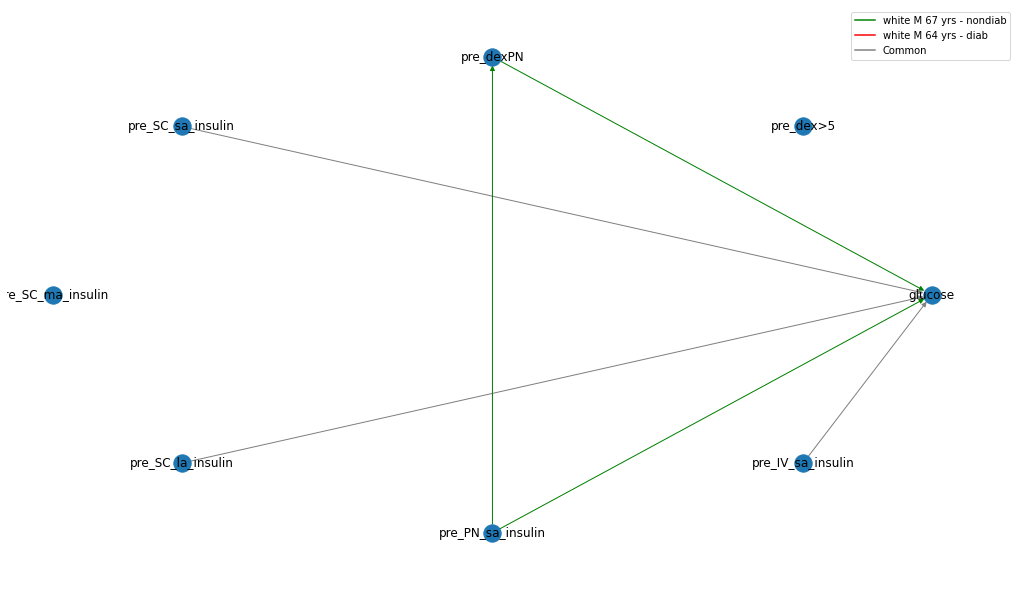

In [51]:
plt.figure(figsize=(14,8))
nx.draw_circular(super_graph, edge_color=edge_colors)
nx.draw_networkx_labels(super_graph, pos=nx.circular_layout(super_graph))
green_line = mlines.Line2D([], [], color='green', markersize=2, label='white M 67 yrs - nondiab')
red_line = mlines.Line2D([], [], color='red', markersize=2, label='white M 64 yrs - diab')
gray_line = mlines.Line2D([], [], color='gray', markersize=2, label='Common')
plt.legend(handles=[green_line, red_line, gray_line])
plt.show()

### DAGS - collective

In [92]:
meta_diabetic_df = metadata_df[metadata_df['diabetes'] == 1]
meta_nonDiabetic_df = metadata_df[metadata_df['diabetes'] == 0]

meta_child_df = metadata_df[metadata_df['admission_age'] < 20]
meta_youth_df = metadata_df[(20<=metadata_df['admission_age']) & (metadata_df['admission_age'] < 40)]
meta_middleAged_df = metadata_df[(40<=metadata_df['admission_age']) & (metadata_df['admission_age'] < 60)]
meta_old_df = metadata_df[(60 <= metadata_df['admission_age']) & (metadata_df['admission_age'] < 70)]

meta_old_diabetic_df = meta_old_df[meta_old_df['diabetes'] == 1]
meta_old_nonDiabetic_df = meta_old_df[meta_old_df['diabetes'] == 0]

meta_youth_diabetic_df = meta_youth_df[meta_youth_df['diabetes'] == 1]
meta_youth_nonDiabetic_df = meta_youth_df[meta_youth_df['diabetes'] == 0]


In [93]:
diabetic_df = cohort_df[cohort_df['diabetes'] == 1]
nonDiabetic_df = cohort_df[cohort_df['diabetes'] == 0]

child_df = cohort_df[cohort_df['admission_age'] < 20]
youth_df = cohort_df[(20<=cohort_df['admission_age']) & (cohort_df['admission_age'] < 40)]
middleAged_df = cohort_df[(40<=cohort_df['admission_age']) & (cohort_df['admission_age'] < 60)]
old_df = cohort_df[(60 <= cohort_df['admission_age']) & (cohort_df['admission_age'] < 70)]

old_diabetic_df = old_df[old_df['diabetes'] == 1]
old_nonDiabetic_df = old_df[old_df['diabetes'] == 0]

youth_diabetic_df = youth_df[youth_df['diabetes'] == 1]
youth_nonDiabetic_df = youth_df[youth_df['diabetes'] == 0]

In [94]:
old_diabetic_set =  set(meta_old_diabetic_df[meta_old_diabetic_df['stay_counts'] > 100].stay_id)
old_nonDiabetic_set =  set(meta_old_nonDiabetic_df[meta_old_nonDiabetic_df['stay_counts'] > 100].stay_id)

In [95]:
youth_diabetic_set =  set(meta_youth_diabetic_df[meta_youth_diabetic_df['stay_counts'] > 100].stay_id)
youth_nonDiabetic_set =  set(meta_youth_nonDiabetic_df[meta_youth_nonDiabetic_df['stay_counts'] > 100].stay_id)

In [97]:
print('Number of old diabetic patients with >130 observations in hospital are: ', len(old_diabetic_set))
print('Number of old non-diabetic patients with >130 observations in hospital are: ', len(old_nonDiabetic_set))

Number of old diabetic patients with >130 observations in hospital are:  229
Number of old non-diabetic patients with >130 observations in hospital are:  161


In [96]:
print('Number of youth diabetic patients with >130 observations in hospital are: ', len(youth_diabetic_set))
print('Number of youth old non-diabetic patients with >130 observations in hospital are: ', len(youth_nonDiabetic_set))

Number of youth diabetic patients with >130 observations in hospital are:  23
Number of youth old non-diabetic patients with >130 observations in hospital are:  79


In [104]:
threshold = 0.7
a = youth_nonDiabetic_df[youth_nonDiabetic_df.stay_id.isin(youth_nonDiabetic_set)]
b = youth_diabetic_df[youth_diabetic_df.stay_id.isin(youth_diabetic_set)]
a = from_pandas(a[covariate_list].dropna().sample(min(40000, len(a))))
b = from_pandas(b[covariate_list].dropna().sample(min(40000, len(b))))
a.remove_edges_below_threshold(threshold)
b.remove_edges_below_threshold(threshold)

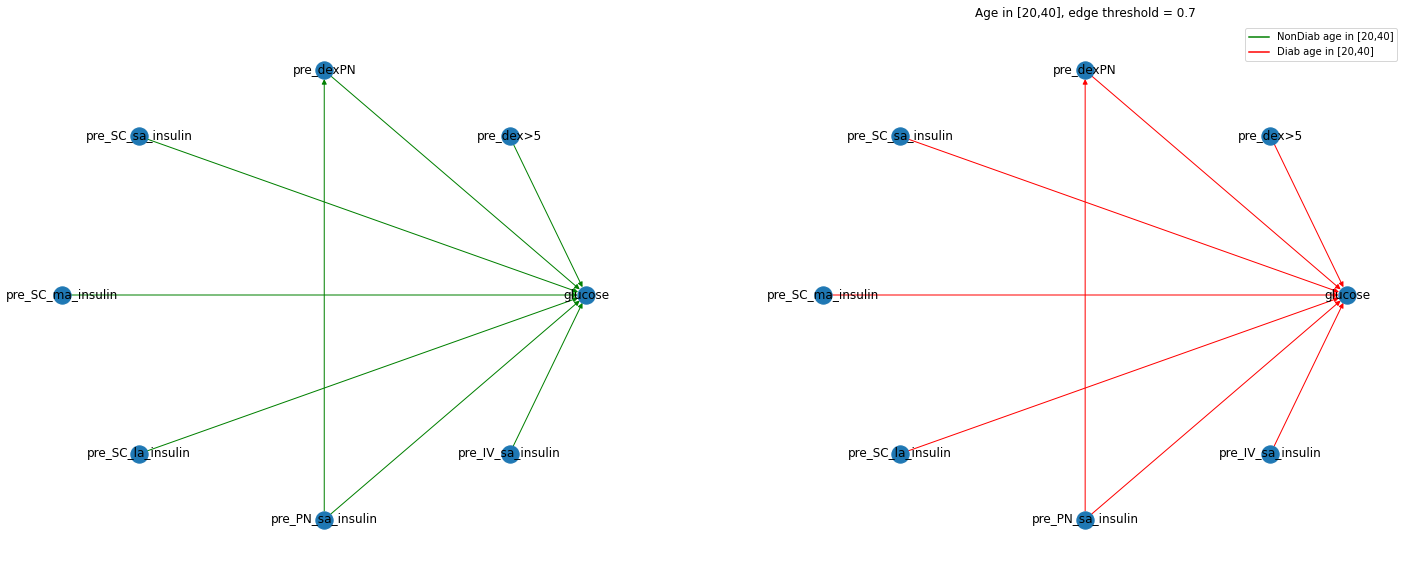

In [107]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
nx.draw_circular(a, edge_color='green')
nx.draw_networkx_labels(a, pos=nx.circular_layout(a))
plt.subplot(1,2,2)
nx.draw_circular(b, edge_color='red')
nx.draw_networkx_labels(b, pos=nx.circular_layout(b))
green_line = mlines.Line2D([], [], color='green', markersize=2, label='NonDiab age in [20,40]')
red_line = mlines.Line2D([], [], color='red', markersize=2, label='Diab age in [20,40]')
plt.legend(handles=[green_line, red_line])
plt.title(f'Age in [20,40], edge threshold = {threshold}')
plt.show()

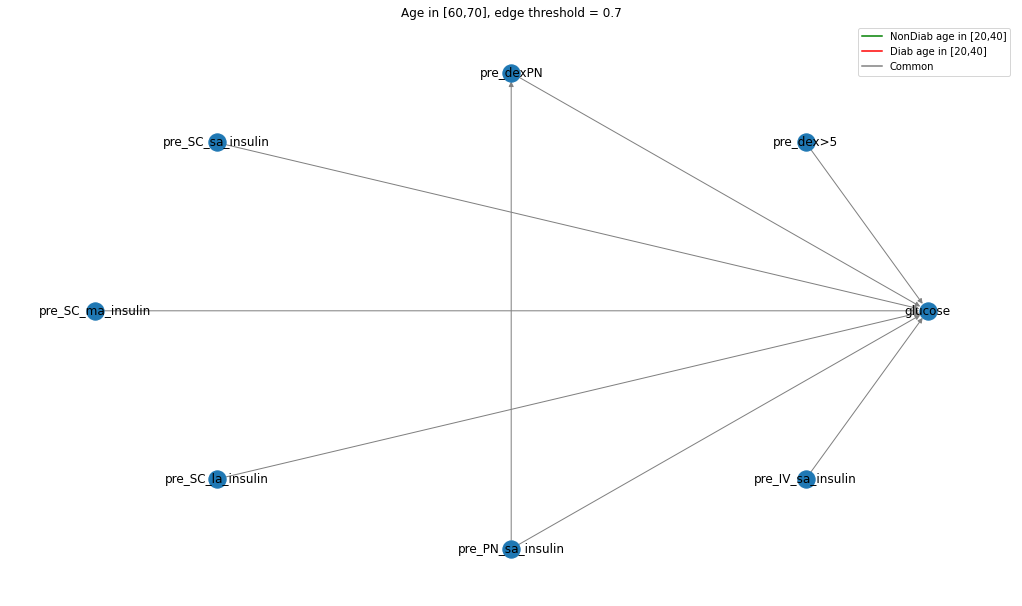

In [108]:
edges_a = set(a.edges)
edges_b = set(b.edges)
common_edges = edges_a.intersection(edges_b)
edges_a_only = edges_a.difference(edges_b)
edges_b_only = edges_b.difference(edges_a)

super_graph = nx.compose(a, b)
edge_colors = []
for e in super_graph.edges:
    if e in common_edges:
        edge_colors.append('gray')
    elif e in edges_a_only:
        edge_colors.append('green')
    elif e in edges_b_only:
        edge_colors.append('red')

plt.figure(figsize=(14,8))
nx.draw_circular(super_graph, edge_color=edge_colors)
nx.draw_networkx_labels(super_graph, pos=nx.circular_layout(super_graph))
green_line = mlines.Line2D([], [], color='green', markersize=2, label='NonDiab age in [20,40]')
red_line = mlines.Line2D([], [], color='red', markersize=2, label='Diab age in [20,40]')
gray_line = mlines.Line2D([], [], color='gray', markersize=2, label='Common')
plt.legend(handles=[green_line, red_line, gray_line])
plt.title(f'Age in [60,70], edge threshold = {threshold}')
plt.show()